# 🧩 Notebook 04: Sampling & Resampling with SciPy

In [1]:
# Setup and Imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sys


# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Custom utils
from utils.sim_utils import (
    sample_uniform,
    stratified_sample,
    weighted_sample,
    draw_multinomial_sample,
    draw_dirichlet_sample,
    sample_custom_discrete,
    resample_with_replacement,
    compute_ecdf
)
from utils.viz_utils import (
    plot_ecdf_comparison_multi,
    plot_sampling_distributions,
    save_and_show_plot
)

# Paths
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/04_sampling_resampling")
EXPORT_TABLES = Path("../exports/tables/04_sampling_resampling")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 📦 Load Categorical and Poisson Data

In [2]:
# Load data
cat_counts = pd.read_csv(DATA_PATH / "exports" / "categorical_counts.csv", index_col=0)
poisson_df = pd.read_csv(DATA_PATH / "exports" / "poisson_data.csv")

display(cat_counts)
display(poisson_df.head())

,count
A,319
B,393
C,188
D,100


,counts
0,5
1,4
2,4
3,4
4,2


## 🔹 Section 1: Uniform & Weighted Sampling

In [3]:
# Uniform sampling from categories
uniform_sample = sample_uniform(cat_counts.index, n=100)

# Weighted sampling
weights = cat_counts.values.flatten() / cat_counts.sum().sum()
weighted_smpl = weighted_sample(cat_counts.index, weights, n=200)


## 🔹 Section 2: Stratified Sampling

In [4]:
# Construct stratified sample
df_strat = pd.DataFrame({
    "category": np.random.choice(cat_counts.index, p=weights, size=1000),
    "value": np.random.randn(1000)
})
stratified = stratified_sample(df_strat, stratify_col="category", frac=0.2)

/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/utils/sim_utils.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=frac, random_state=seed))


## 🔹 Section 3: Custom Discrete Sampling

In [5]:
custom_sample = sample_custom_discrete(
    support_vals=[0, 1, 2, 3],
    probs=[0.1, 0.3, 0.4, 0.2],
    size=1000
)

## 🔹 Section 4: Dirichlet and Multinomial Sampling

In [6]:
multi_sample = draw_multinomial_sample(n=100, probs=weights, size=1)
dirichlet = draw_dirichlet_sample(alpha=[1, 1, 1, 1], size=1)

## 🔹 Section 5: Resampling and Bootstrapping (Poisson)

In [7]:
resampled_poisson = resample_with_replacement(poisson_df['counts'], n_samples=500)

# Compare ECDFs
x_emp, y_emp = compute_ecdf(poisson_df['counts'])
x_res, y_res = compute_ecdf(resampled_poisson)

In [8]:
# 📤 Export sampled datasets
pd.Series(uniform_sample).to_csv(EXPORT_TABLES / "uniform_sample.csv", index=False)
pd.Series(weighted_smpl).to_csv(EXPORT_TABLES / "weighted_sample.csv", index=False)
stratified.to_csv(EXPORT_TABLES / "stratified_sample.csv", index=False)
pd.Series(custom_sample).to_csv(EXPORT_TABLES / "custom_discrete_sample.csv", index=False)
pd.Series(multi_sample[0]).to_csv(EXPORT_TABLES / "multinomial_sample.csv", index=False)
pd.Series(dirichlet[0]).to_csv(EXPORT_TABLES / "dirichlet_sample.csv", index=False)
pd.Series(resampled_poisson).to_csv(EXPORT_TABLES / "bootstrap_poisson.csv", index=False)

## 📈 Section 6: Visualize ECDF Comparison (Resampled vs Original)

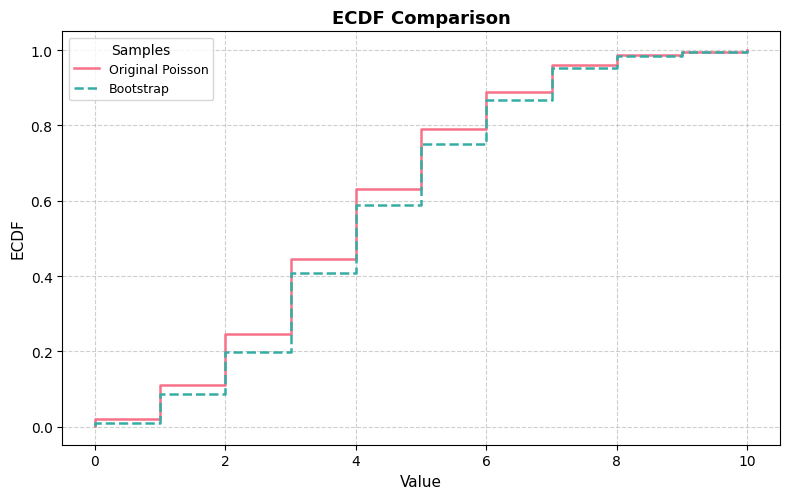

In [9]:
# 📈 Section 6: Visualize ECDF Comparison (Resampled vs Original)
fig_ecdf = plot_ecdf_comparison_multi({
    "Original Poisson": (x_emp, y_emp),
    "Bootstrap": (x_res, y_res)
})
save_and_show_plot(fig_ecdf, EXPORT_PLOTS / "ecdf_bootstrap_poisson.png")

## 📈 Section 7: Sampling Statistics Comparison Block

In [10]:
# 📊 Sampling Summary Statistics
sampling_stats = pd.DataFrame({
    "Original": [poisson_df['counts'].mean(), poisson_df['counts'].std()],
    "Bootstrap": [resampled_poisson.mean(), resampled_poisson.std()],
    "Uniform": [len(uniform_sample), None],
    "Weighted": [len(weighted_smpl), None]
}, index=["Mean (or Count)", "Std Dev"]).T

sampling_stats.to_csv(EXPORT_TABLES / "sampling_stats_summary.csv")
display(sampling_stats)

,Mean (or Count),Std Dev
Original,3.932,1.976661
Bootstrap,4.158,1.962915
Uniform,100.000,NaN
Weighted,200.000,NaN


## 🔹 Section 7: Combined Sampling Distributions Visualization

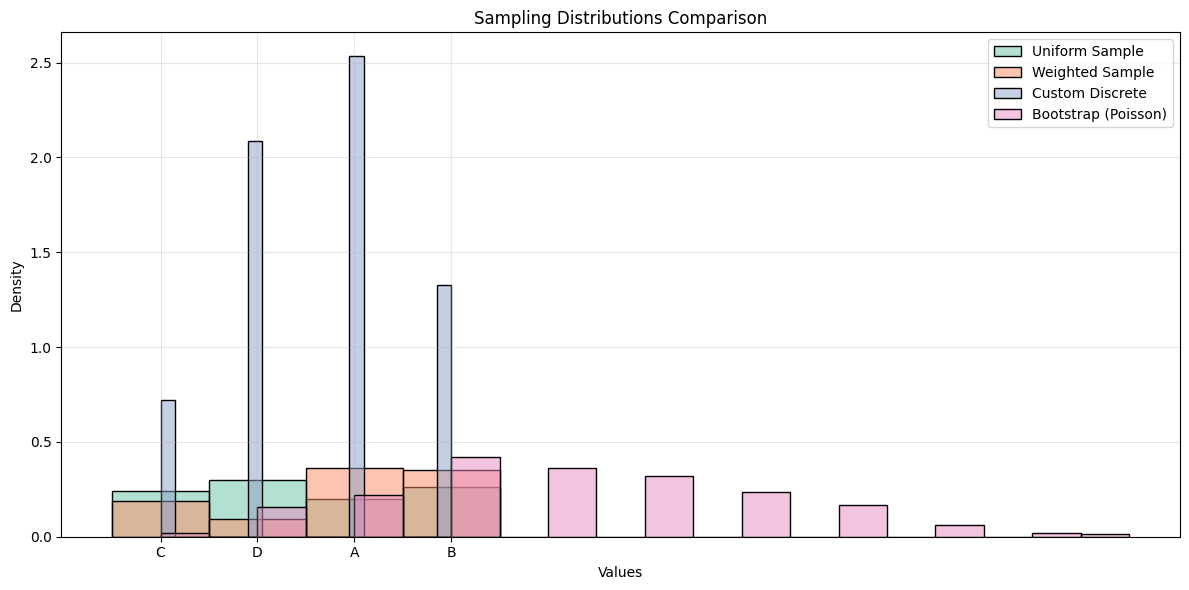

In [11]:
# Visualization

samples_to_plot = {
    "Uniform Sample": uniform_sample,
    "Weighted Sample": weighted_smpl,
    "Custom Discrete": custom_sample,
    "Bootstrap (Poisson)": resampled_poisson
}


fig_samples = plot_sampling_distributions(samples_to_plot)
save_and_show_plot(fig_samples, EXPORT_PLOTS / "sampling_distributions_comparison.png")


## 🔹 Section 8: Sampling Frequency Table

In [12]:
# Sampling Frequency Table
freq_table = pd.DataFrame({
    "Original Counts": cat_counts.values.flatten(),
    "Uniform Sample": pd.Series(uniform_sample).value_counts().reindex(cat_counts.index, fill_value=0),
    "Weighted Sample": pd.Series(weighted_smpl).value_counts().reindex(cat_counts.index, fill_value=0),
}, index=cat_counts.index)

freq_table.to_csv(EXPORT_TABLES / "sampling_frequency_comparison.csv")
display(freq_table)


,Original Counts,Uniform Sample,Weighted Sample
A,319,20,73
B,393,26,70
C,188,24,38
D,100,30,19


## 🧠 Key Takeaways
- Sampling is not just a method, it's a simulation strategy — uniform vs weighted can drastically change sample quality.
- Stratified sampling is essential for keeping category balance in imbalanced data.
- Custom discrete distributions using rv_discrete allow complete flexibility in modeling.
- Multinomial helps simulate multinomial outcomes (e.g., coin flips, dice rolls).
- Dirichlet distributions are useful for simulating prior probabilities and Bayesian contexts.
- Bootstrap resampling (with ECDF comparison) is a nonparametric approach to statistical inference and error estimation.

## ✅ Summary
In this notebook, we:

- Loaded synthetic categorical and Poisson data
- Performed uniform, weighted, and stratified sampling
- Used custom discrete, multinomial, and Dirichlet sampling techniques
- Demonstrated resampling with replacement (bootstrap)
- Compared original vs bootstrap distributions using ECDF overlays
- Exported all necessary figures and datasets for reproducibility